In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Daily Bitcoin price

In [2]:
btc_data = pd.read_csv("BTC_price_2013-01-01_2024-12-15.csv",parse_dates=["Date"], index_col="Date")
btc_data = btc_data.iloc[::-1]
bitcoin_price = pd.DataFrame(btc_data["Price"])
bitcoin_price = bitcoin_price[bitcoin_price.index >= '2017-01-01']

In [3]:
bitcoin_price.head()

,Price
Date,
2017-01-01,995.4
2017-01-02,1017.0
2017-01-03,1033.3
2017-01-04,1135.4
2017-01-05,989.3


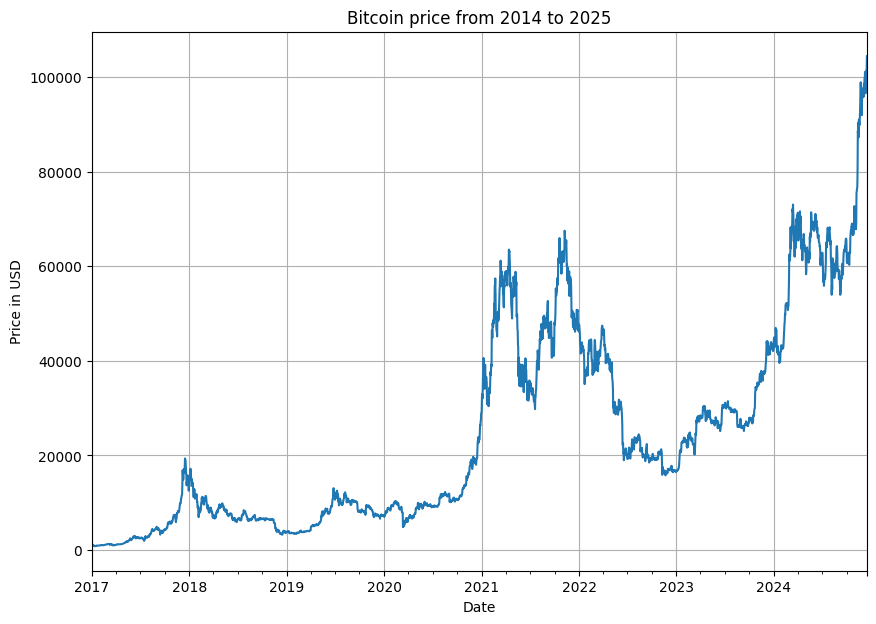

In [4]:
import matplotlib.pyplot as plt
bitcoin_price.plot(figsize=(10, 7))
plt.title("Bitcoin price from 2014 to 2025")
plt.ylabel("Price in USD")
plt.xlabel("Date")
plt.legend().remove()
plt.grid()
plt.show()

## Naive model

In [5]:
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open("BTC_price_2013-01-01_2024-12-15.csv", "r") as f:
    csv_reader = csv.reader(f, delimiter=",")
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1], "%Y-%m-%d"))
        btc_price.append(float(line[2]))
        
timesteps = bitcoin_price.index.to_numpy()
prices = bitcoin_price["Price"].to_numpy()

In [6]:
split_size = int(0.9 * len(prices)) 
X_test, y_test = timesteps[split_size:], prices[split_size:]
X_train, y_train = timesteps[:split_size], prices[:split_size]

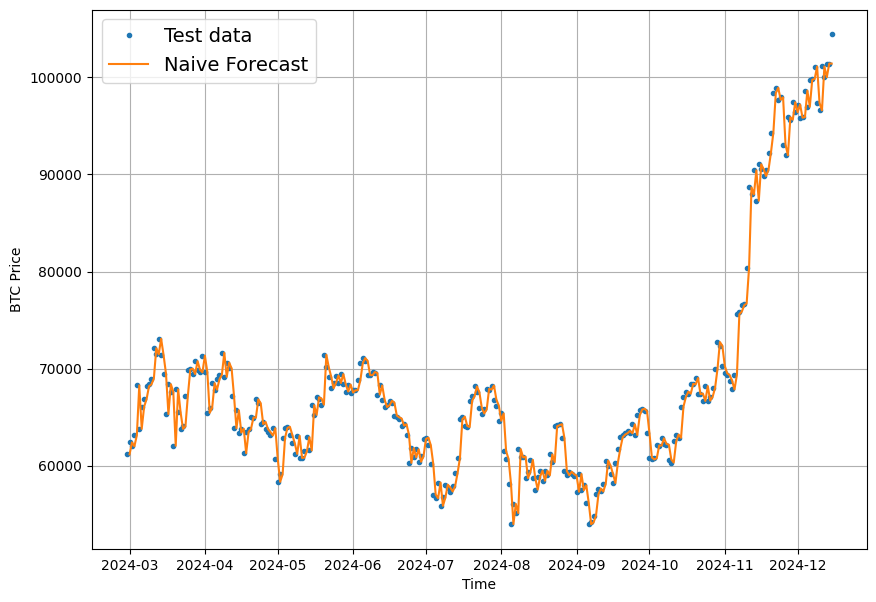

In [18]:
from functions import plot_time_series
naive_forecast = y_test[:-1]
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test, values=y_test, label="Test data",format=".")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", label="Naive Forecast")

### Evaluate Naive model

In [12]:
from functions import evaluate_preds
results = evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)
results

{'mae': np.float32(1386.9772),
 'mse': np.float32(3616419.0),
 'rmse': np.float32(1901.6885),
 'mape': np.float32(2.040159),
 'mase': np.float32(0.99960446)}